In [1]:
%matplotlib inline

'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

import matplotlib.pyplot as plt
import datetime as dt

Using Theano backend.
Using gpu device 0: Tesla K20c (CNMeM is enabled with initial size: 95.0% of memory, cuDNN not available)


In [2]:
def plotHistory(hist, score, time_secs, savePlot=True):
    plt.plot(hist.history['acc'])
    title = 'Accuracy over training - batch_size: ' + str(hist.params['batch_size']) +"\nTest score: "+ str(score[0])+" - Test acc:"+str(score[1]) +"\nTraining time [secs]: "+ str(time_secs)
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    # saving?
    if savePlot:
        plt.savefig(title +'.png', format='PNG', dpi=200, bbox_inches='tight', pad_inches=0.7)
    plt.show()

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Compiling model
Training model


WARNING (theano.gof.compilelock): Overriding existing lock by dead process '2486783' (I am process '2487736')


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 48s - loss: 0.3912 - acc: 0.8790 - val_loss: 0.0977 - val_acc: 0.9693
Epoch 2/12
60000/60000 [==============================] - 48s - loss: 0.1393 - acc: 0.9593 - val_loss: 0.0626 - val_acc: 0.9804
Epoch 3/12
60000/60000 [==============================] - 48s - loss: 0.1063 - acc: 0.9682 - val_loss: 0.0538 - val_acc: 0.9836
Epoch 4/12
60000/60000 [==============================] - 48s - loss: 0.0888 - acc: 0.9736 - val_loss: 0.0441 - val_acc: 0.9853
Epoch 5/12
60000/60000 [==============================] - 48s - loss: 0.0779 - acc: 0.9773 - val_loss: 0.0424 - val_acc: 0.9850
Epoch 6/12
60000/60000 [==============================] - 48s - loss: 0.0713 - acc: 0.9782 - val_loss: 0.0420 - val_acc: 0.9862
Epoch 7/12
60000/60000 [==============================] - 48s - loss: 0.0629 - acc: 0.9811 - val_loss: 0.0358 - val_acc: 0.9879
Epoch 8/12
60000/60000 [==============================

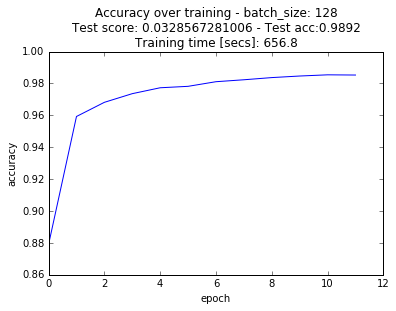

In [3]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

print('Compiling model')
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])




print('Training model')
n1=dt.datetime.now()
M = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
n2=dt.datetime.now()
print('Evaluating model')
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
plotHistory(M, score, round((n2-n1).total_seconds(), 1), savePlot=False)